## clustering python notebook

In [1]:
import os 
os.getcwd()

'/Users/Hussein/Documents/Code Repos/spidercartographers/Scripts'

In [2]:
# importing libraries required
import pandas as pd
import plotly.express as px
import sklearn.preprocessing as preprocessing
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.cluster import AgglomerativeClustering
from sklearn import neighbors
import numpy as np

# run this command too - just to allow more data to be displayed than default
pd.set_option('display.max_rows', 200)
# this one ensures graphs properly display in the notebook
%matplotlib inline

In [3]:
#put the data into a dataframe
yj = pd.read_csv('Data/yeojohnson_zscore_st.csv')
#check that is has been read correctly
yj

,Unnamed: 0,MSOA,yj_HH_owning_cars_perc,yj_work_from_home_perc,yj_underground_metro_perc,yj_train_perc,yj_bus_perc,yj_bicycle_perc,yj_on_foot_perc,yj_avg_time_from_origin_car_UNWEIGHTED,yj_avg_time_car,yj_avg_time_from_origin_bus_UNWEIGHTED,yj_avg_time_bus,yj_avg_time_from_origin_rail_UNWEIGHTED,yj_avg_time_rail,yj_car_perc
0,0,E02000001,-2.078686,1.094545,1.965725,0.756826,0.058967,1.275285,2.541451,NaN,1.481788,NaN,-1.337881,NaN,-0.941110,-2.112126
1,1,E02000002,-1.009171,-1.009040,1.957405,1.108707,1.222531,-0.534930,-0.984309,NaN,-0.456789,NaN,0.386653,NaN,-0.443501,-1.111678
2,2,E02000003,-0.623687,-0.780242,1.943847,1.734370,0.828451,-1.106924,-0.540533,NaN,-0.760907,NaN,0.414225,NaN,-0.445279,-1.374803
3,3,E02000004,-0.106580,-1.025167,1.923226,1.495577,0.753078,-0.533747,-0.292659,NaN,-0.555122,NaN,-0.237495,NaN,-0.514662,-0.963451
4,4,E02000005,-0.796578,-1.065720,1.941546,1.416714,1.250196,-0.280787,-0.661333,NaN,-0.998789,NaN,0.135678,NaN,-0.484465,-1.195965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,7196,W02000419,0.101249,-0.322619,-0.929960,-0.612976,-0.491386,0.402422,0.322708,NaN,-0.265651,NaN,-1.214749,NaN,1.738647,0.938470
7197,7197,W02000420,1.144891,0.902061,-0.445428,-0.998451,-0.435735,-0.358857,-1.275943,NaN,1.011251,NaN,-0.349478,NaN,1.220594,1.196903
7198,7198,W02000421,1.093962,1.984056,-0.587092,-1.603167,-1.136411,-0.957006,-1.279329,NaN,1.948483,NaN,1.184156,NaN,2.020649,0.341567
7199,7199,W02000422,0.433334,-1.183888,-0.749961,0.675719,0.491015,0.775006,1.401139,NaN,0.601903,NaN,-1.476719,NaN,1.482596,-0.441150


In [4]:
# store MSOA column 
MSOA = yj[['MSOA']]

In [5]:
# drop non numeric columns
yj.drop(['Unnamed: 0', 'MSOA'], axis=1, inplace=True)
yj

,yj_HH_owning_cars_perc,yj_work_from_home_perc,yj_underground_metro_perc,yj_train_perc,yj_bus_perc,yj_bicycle_perc,yj_on_foot_perc,yj_avg_time_from_origin_car_UNWEIGHTED,yj_avg_time_car,yj_avg_time_from_origin_bus_UNWEIGHTED,yj_avg_time_bus,yj_avg_time_from_origin_rail_UNWEIGHTED,yj_avg_time_rail,yj_car_perc
0,-2.078686,1.094545,1.965725,0.756826,0.058967,1.275285,2.541451,NaN,1.481788,NaN,-1.337881,NaN,-0.941110,-2.112126
1,-1.009171,-1.009040,1.957405,1.108707,1.222531,-0.534930,-0.984309,NaN,-0.456789,NaN,0.386653,NaN,-0.443501,-1.111678
2,-0.623687,-0.780242,1.943847,1.734370,0.828451,-1.106924,-0.540533,NaN,-0.760907,NaN,0.414225,NaN,-0.445279,-1.374803
3,-0.106580,-1.025167,1.923226,1.495577,0.753078,-0.533747,-0.292659,NaN,-0.555122,NaN,-0.237495,NaN,-0.514662,-0.963451
4,-0.796578,-1.065720,1.941546,1.416714,1.250196,-0.280787,-0.661333,NaN,-0.998789,NaN,0.135678,NaN,-0.484465,-1.195965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,0.101249,-0.322619,-0.929960,-0.612976,-0.491386,0.402422,0.322708,NaN,-0.265651,NaN,-1.214749,NaN,1.738647,0.938470
7197,1.144891,0.902061,-0.445428,-0.998451,-0.435735,-0.358857,-1.275943,NaN,1.011251,NaN,-0.349478,NaN,1.220594,1.196903
7198,1.093962,1.984056,-0.587092,-1.603167,-1.136411,-0.957006,-1.279329,NaN,1.948483,NaN,1.184156,NaN,2.020649,0.341567
7199,0.433334,-1.183888,-0.749961,0.675719,0.491015,0.775006,1.401139,NaN,0.601903,NaN,-1.476719,NaN,1.482596,-0.441150


In [6]:
yj.isna().sum() 

yj_HH_owning_cars_perc                        0
yj_work_from_home_perc                        0
yj_underground_metro_perc                     0
yj_train_perc                                 0
yj_bus_perc                                   0
yj_bicycle_perc                               0
yj_on_foot_perc                               0
yj_avg_time_from_origin_car_UNWEIGHTED     7201
yj_avg_time_car                               0
yj_avg_time_from_origin_bus_UNWEIGHTED     7201
yj_avg_time_bus                               0
yj_avg_time_from_origin_rail_UNWEIGHTED    7201
yj_avg_time_rail                              0
yj_car_perc                                   0
dtype: int64

In [7]:
# drop any columns with NA values
yj.dropna(axis = 1, how = 'any', inplace = True)
yj.isna().sum() 

yj_HH_owning_cars_perc       0
yj_work_from_home_perc       0
yj_underground_metro_perc    0
yj_train_perc                0
yj_bus_perc                  0
yj_bicycle_perc              0
yj_on_foot_perc              0
yj_avg_time_car              0
yj_avg_time_bus              0
yj_avg_time_rail             0
yj_car_perc                  0
dtype: int64

## DBSCAN

In [8]:
# We need to select the epsilon and min_smaples parameters

# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
# eps: Two points are considered neighbors if the distance between the two points is below the threshold epsilon.
# min_samples: The minimum number of neighbors a given point should have in order to be classified as a core point. 
from sklearn import neighbors

neigh = neighbors.NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(yj)
distances, indices = nbrs.kneighbors(yj)
distances

array([[0.        , 1.07785402],
       [0.        , 0.76684992],
       [0.        , 0.57846521],
       ...,
       [0.        , 0.93122235],
       [0.        , 1.49595531],
       [0.        , 1.03029305]])

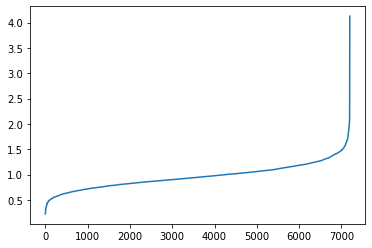

In [9]:
# sort and plot the results
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [10]:
# create DBSCAN cluster object

# the eps is at the point of maximum curvature in the graph above
dbscan = DBSCAN(eps=1.4, min_samples=5) 

#algorith to be used by the NearestNeighbors module to compute pointwise distance and find neighest neighbours - see NN module documentation
# run the .fit() function on the scaled dataset
dbscan.fit(yj) 



DBSCAN(algorithm='auto', eps=1.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [11]:
#Get the labels from the clusters
dbscan_labels = dbscan.labels_
#dbscan_labels
# to get number of clusters
len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

4

In [12]:
#check the silhouette score
# A silhouette score ranges from -1 to 1, with -1 being the worst score possible and 1 
# being the best score. Silhouette scores of 0 suggest overlapping clusters.
metrics.silhouette_score(yj, dbscan_labels)

-0.03533509512180161

In [13]:
#assign the labels to the original dataframe
yj_zscore_DB =yj.assign(label = dbscan_labels)

#and check the value counts
yj_zscore_DB.label.value_counts()

 0    6627
-1     556
 2       8
 3       5
 1       5
Name: label, dtype: int64

In [14]:
# re-insert MSOA column
yj_zscore_DB =pd.concat([MSOA, yj_zscore_DB], axis='columns')
#save to csv
yj_zscore_DB.to_csv('Data/Clustering_Results/yeojohnson_zscore_st_DBSCAN.csv')

## kmeans clustering

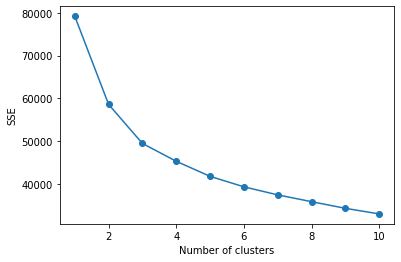

In [15]:
#elbow plot over multiple k's

#calculate SSE for a range of number of cluster

list_SSE = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(yj)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    list_SSE.append(km.inertia_)

# plot
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [16]:
#set the number of clusters to explore
k_cluster = 3
#set the random seed
random_seed = 1
#random state: int, default = None
#determines random number generation for ecntroid intialisation, use an int to make the randomness deterministic

In [17]:
#get the method for kmeans
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
#apply the fit to the scaled dataset
kmeans_method.fit(yj)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [18]:
#assign the labels to original databse
yj_zscore_kmeans = yj.assign(label = kmeans_method.labels_)

In [19]:
# re-insert MSOA column
yj_zscore_kmeans =pd.concat([MSOA, yj_zscore_kmeans], axis='columns')
#save to csv
yj_zscore_kmeans.to_csv('Data/Clustering_Results/yeojohnson_zscore_st_kmeans.csv')

In [20]:
# #silhouette score over multiple k's

# #empty array to hold the silhouette scores
# silhouette = []

# #iterate over the number of clusters from 2 to 10
# for i in range(2, 10):
#     #create an empty array to store the average
#     average = []
#     #repeat the kmeans clustering 10 times
#     for x in range(1, 10):
#         #setting the number of clusters as i
#         k_cluster = i
#         #create a random integer for the random seed
#         random_seed = random.randint(1,101)
#         #run the kmeans analysis
#         kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
#         #fit it to the scaled dataset
#         kmeans_method.fit(yj)
#         #get the labels
#         labels = kmeans_method.labels_
#         #get the silhouette score
#         a = metrics.silhouette_score(yj, labels)
#         #append it to the average list
#         average.append(a)
#     #get the silhouette score and append it to the silhouette 
#     silhouette.append(sum(average)/len(average))
    
# #plot the silhouette score
# plt.plot(silhouette)

## Agglomerative clustering

In [21]:
#set the number of clusters expected (from elbow diagram in kmeans part)
n_clusters = 3

#get the hierarchy method
hierarchy = AgglomerativeClustering(n_clusters = n_clusters)

#fit it to the data
hierarchy.fit(yj)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [22]:
#assign labels to the original data
yj_zscore_hierarchy = yj.assign(label = hierarchy.labels_)

In [23]:
hierarchy_labels = hierarchy.labels_

#check the silhouette score
metrics.silhouette_score(yj, hierarchy_labels)

0.18035697608944076

In [24]:
# re-insert MSOA column
yj_zscore_hierarchy =pd.concat([MSOA, yj_zscore_hierarchy], axis='columns')
#save to csv
yj_zscore_hierarchy.to_csv('Data/Clustering_Results/yeojohnson_zscore_st_heirarchy.csv')